# Research on Car Sales Ads
Project Report by Allentine Paulis

## Description
This project is to prepare report for research on car sales ads at Crankshaft List. Hundreds of free advertisements for vehicles are published on the site every day.

We need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Data
The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

### Step 1. Open the data file and study the general information. 

In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [713]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/vehicles_us.csv")

In [714]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [716]:
length_original = len(df)
length_original

51525

In [717]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [718]:
df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [719]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [720]:
df.isnull().sum()/len(df) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [721]:
count=0
for col in df.columns:
    rows = df[col].isnull().sum()
    percent = df[col].isnull().sum()/len(df)
    if percent > 0:
        count+=1
    print(f"Column {col} has {percent:.2%} of missing values which is {rows} missing rows")
print(f"There are total {count} columns with missing values")

Column price has 0.00% of missing values which is 0 missing rows
Column model_year has 7.02% of missing values which is 3619 missing rows
Column model has 0.00% of missing values which is 0 missing rows
Column condition has 0.00% of missing values which is 0 missing rows
Column cylinders has 10.21% of missing values which is 5260 missing rows
Column fuel has 0.00% of missing values which is 0 missing rows
Column odometer has 15.32% of missing values which is 7892 missing rows
Column transmission has 0.00% of missing values which is 0 missing rows
Column type has 0.00% of missing values which is 0 missing rows
Column paint_color has 17.99% of missing values which is 9267 missing rows
Column is_4wd has 50.37% of missing values which is 25953 missing rows
Column date_posted has 0.00% of missing values which is 0 missing rows
Column days_listed has 0.00% of missing values which is 0 missing rows
There are total 5 columns with missing values


In [722]:
df.duplicated().sum()

0

In [723]:
for col in df.columns:
    df_count = df[col].value_counts()
    print(f" {col} value counts: \n {df_count} \n")

 price value counts: 
 1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64 

 model_year value counts: 
 2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64 

 model value counts: 
 ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64 

 condition value 

### Conclusion

- There are 51525 rows and 13 columns
- There are 2 integer, 4 float and 7 object dtypes
- The 13 columns are price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed
- There are no duplicated values
- Column model_year has 7.02% of missing values.
- Column cylinders has 10.21% of missing values. 
- Column odometer has 15.32% of missing values. 
- Column paint_color has 17.99% of missing values.
- Column price has 798 value of price with label 1 and at the top, need more investigation those values on the lower end. 
- There are 5 columns with missing values which are model_year, cylinders, odometer, paint_color and is_4wd.
- is_4wd data only contains True boolean values, with 25953 missing rows which are 50.37% missing values. We can't just drop 50% of the data. Since the missing values are very large which is half of the data and the data available was only True boolean, we can assumed that the missing values can be False boolean. 
- Odometer column has 185 values of 0. need to be investigate.

### Step 2. Data preprocessing

- Fill is_4wd missing values with False boolean which is 0

In [724]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [725]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

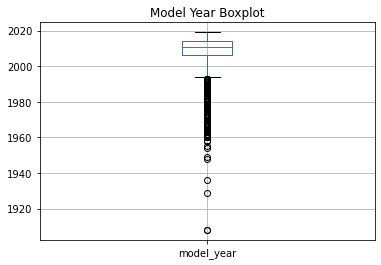

In [726]:
df.boxplot('model_year')
plt.title("Model Year Boxplot")
plt.show()

- Model_year most likely will effect the price and it has 7% missing values, so the missing values will be dropped

In [727]:
df = df.dropna(subset=['model_year'])

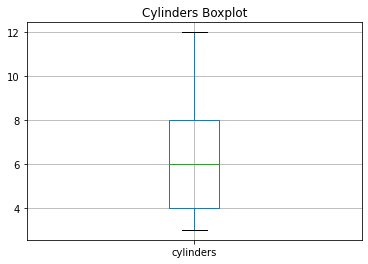

In [728]:
df.boxplot("cylinders")
plt.title("Cylinders Boxplot")
plt.show()

- Fill cylinders missing values with mean values since there is no outlier and change the cylinder data type from float to int64

In [729]:
df['cylinders'].value_counts()

8.0     14705
6.0     14648
4.0     12856
10.0      517
5.0       248
3.0        33
12.0        2
Name: cylinders, dtype: int64

In [730]:
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mean()).astype('int64')

In [731]:
df['cylinders'].value_counts()

6     19545
8     14705
4     12856
10      517
5       248
3        33
12        2
Name: cylinders, dtype: int64

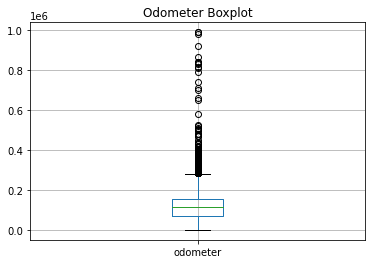

In [732]:
df.boxplot("odometer")
plt.title("Odometer Boxplot")
plt.show()

- Fill odometer missing values with median since there is outliers

In [733]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [734]:
df.loc[df['odometer']== 0]['condition'].value_counts()

good         94
excellent    66
fair          6
like new      4
salvage       2
Name: condition, dtype: int64

In [735]:
len(df[df['odometer']== 0])/length_original*100

0.33381853469189715

- There are odometer with 0 values which is 0.33% but not brand new car. It might be errors. need more information or investigation why it's errors, there is possibilty that the customers can tamper the odometer as well. Since it's very small value, I will leave it for now.

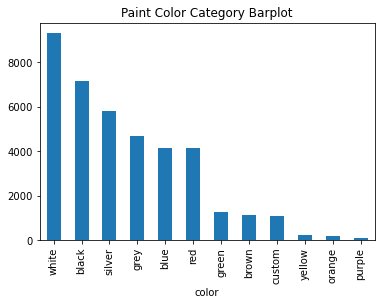

In [736]:
df["paint_color"].value_counts().plot(kind='bar')
plt.title("Paint Color Category Barplot")
plt.xlabel('color')
plt.show()

In [737]:
df["paint_color"].value_counts()/len(df["paint_color"])*100

white     19.463115
black     14.979335
silver    12.130005
grey       9.781656
blue       8.648186
red        8.637749
green      2.667724
brown      2.337912
custom     2.241890
yellow     0.498894
orange     0.432096
purple     0.198305
Name: paint_color, dtype: float64

- At first I want to fill paint_color missing values with the most frequent value (Mode) which is white color. However paint_color missing values are 18% which will be the second top. This observation can't be ignored since the data was not large enough and has pretty large 18% missing values. Another suggestion is to put unknown values while trying to get more information. 
- However from real life observation, I see so many white cars compare to another color. I google around the most popular cars and the most sold cars are also white color. For that reason, I stand to my decision that I fill the paint_color missing values with white color.

In [738]:
df.pivot_table(index='paint_color', columns='type', values='price', aggfunc='count')

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon
paint_color,,,,,,,,,,,,,
black,2069.0,2.0,66.0,445.0,121.0,111.0,21.0,34.0,884.0,1664.0,1456.0,76.0,227.0
blue,968.0,1.0,31.0,192.0,117.0,163.0,18.0,25.0,481.0,1139.0,820.0,74.0,114.0
brown,332.0,NaN,2.0,18.0,12.0,34.0,3.0,8.0,173.0,238.0,237.0,5.0,58.0
custom,287.0,NaN,8.0,20.0,11.0,18.0,5.0,5.0,38.0,276.0,297.0,30.0,79.0
green,399.0,NaN,16.0,37.0,37.0,22.0,17.0,9.0,180.0,188.0,254.0,10.0,109.0
grey,1105.0,NaN,19.0,181.0,93.0,129.0,16.0,28.0,506.0,1503.0,903.0,65.0,138.0
orange,73.0,NaN,4.0,33.0,10.0,NaN,1.0,4.0,22.0,8.0,46.0,1.0,5.0
purple,37.0,NaN,NaN,5.0,3.0,1.0,NaN,1.0,6.0,25.0,16.0,1.0,NaN
red,851.0,NaN,99.0,357.0,94.0,85.0,37.0,19.0,597.0,883.0,1003.0,26.0,87.0


- If I group the value by color and type, there seems lot of black color to be number 1 in many types of car. It doesn't match with the real life observation and google research about the most favorite and most sold car is white. For those reason, it increased the certainty that the missing values are white. 

In [739]:
# Filled by mode
df["paint_color"] = df["paint_color"].fillna(df["paint_color"].mode()[0])

In [740]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [741]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders         int64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

- Change odometer to int64

In [742]:
df['odometer'] = df['odometer'].astype('int64')

- Change is_4wd from float to int since it's only 1 and 0 value

In [743]:
df['is_4wd'] = df['is_4wd'].astype('int64')

- Change model_year data type into int64

In [744]:
df['model_year'] = df['model_year'].astype('int64')

- Change date_posted into datetime datatype

In [745]:
df['date_posted'].head(1)

0    2018-06-23
Name: date_posted, dtype: object

In [746]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format ='%Y-%m-%dT%H:%M:%S')

In [747]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [748]:
df['model'].nunique()

100

In [749]:
def model_category(model):
    if 'chevrolet' in model:
        return 'chevrolet'
    elif 'bmw' in model:
        return 'bmw'
    elif 'toyota' in model:
        return 'toyota'
    elif 'hyundai' in model:
        return 'hyundai'
    elif 'ford' in model:
        return 'ford'
    elif 'chrysler' in model:
        return 'chrysler'
    elif 'honda' in model:
        return 'honda'
    elif 'kia' in model:
        return 'kia'
    elif 'ram' in model:
        return 'ram'
    elif 'gmc' in model:
        return 'gmc'
    elif 'jeep' in model:
        return 'jeep'
    elif 'ford' in model:
        return 'ford'
    elif 'nissan' in model:
        return 'nissan'
    elif 'subaru' in model:
        return 'subaru'
    elif 'dodge' in model:
        return 'dodge'
    elif 'acura' in model:
        return 'acura'
    elif 'volkswagen' in model:
        return 'volkswagen'
    elif 'mercedes-benz' in model:
        return 'mercedes-benz'
    elif 'cadillac' in model:
        return 'cadillac'
    elif 'ram' in model:
        return 'ram'
    elif 'buick' in model:
        return 'buick'
    else:
        return 'others'

In [750]:
# found out a simple way to get the model category by taking the first word after the strings are splitted
# df['model_category'] = df['model'].str.split().str[0]

In [751]:
df['model_category'] = df['model'].apply(model_category)

In [752]:
df['model_category'].nunique()

19

### Conclusion

- model_year missing values were dropped because it has 7% missing values.
- is_4wd missing values were filled with False boolean which is 0
- cylinders missing values were filled with mean values since there is no outlier and change the cylinder data type from float to int64
- odometer missing values were filled with median since there is outliers
- There is 0 odometer values with various condition (not brand new) which is 0.33% 
-  paint_color missing values were filled with the most frequent value (Mode) which is white color. This observation can't be ignored since the data was not large enough and has 18% missing values, so we need to fill this missing values.
- There is no missing values left
- is_4wd is changed into numerical int data type from float type since it only has 1 and 0 values
- Date_posted is changed into datetime data type
- Odometer is changed into int type since odometer in car has rounded numerical values.
- All feature columns have correct data types
- Model_category column is categorized from 100 unique values model to 19 category


### Step 3. Make calculations and add them to the table

In [753]:
df['weekday'] = df['date_posted'].dt.weekday # 0 is Monday, 6 is Sunday
df['month'] = pd.DatetimeIndex(df['date_posted']).month
df['year'] = pd.DatetimeIndex(df['date_posted']).year

In [754]:
df['age'] = df['year'] - df['model_year']

- If the vehicle data age is 0 years, average mile per year is odometer mileage

In [755]:
df.loc[df['age']==0,'avg_mil_year'] = df.loc[df['age']==0,'odometer']

- If the data vehicle age is not 0 years, average mile per year is odometer / age 

In [756]:
df.loc[df['age']!=0, 'avg_mil_year'] = df['odometer'] / df['age']

- Change the average mileage per year data type to integer since odometer is numerical integer value not float

In [757]:
df['avg_mil_year'] = df['avg_mil_year'].astype('int64')

In [758]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_category,weekday,month,year,age,avg_mil_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,bmw,5,6,2018,7,20714
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,white,0,2019-03-22,9,ford,4,3,2019,16,7062
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,chrysler,2,6,2018,4,14488


In [759]:
df['condition'].value_counts()

excellent    23074
good         18695
like new      4409
fair          1492
new            133
salvage        103
Name: condition, dtype: int64

In [760]:
def condition_num(x):
    if x == 'new':
        return 5
    elif x == 'like new':
        return 4
    elif x== 'excellent':
        return 3
    elif x == 'good':
        return 2
    elif x == 'fair':
        return 1
    else:
        return 0

In [761]:
df['condition'] = df['condition'].apply(condition_num)

In [762]:
df['condition'].value_counts()

3    23074
2    18695
4     4409
1     1492
5      133
0      103
Name: condition, dtype: int64

### Conclusion

- Adding weekday, month, year, age and avg_mil_year (average mileage per year) columns to the dataset
- Replacing string values in condition column with numerical scale
- Average mile per year is odometer divided by age if the age is more than 1 year.
- however when the age is less than 1 year, the average mile per year will be the odometer since we don't have information how many months the age of the car is.
- average mile per year data type is changed into int, since odometer in car usually rounded number, not float.

### Step 4. Carry out exploratory data analysis

Investigate the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. How outliers affect the form and readability of the histograms.

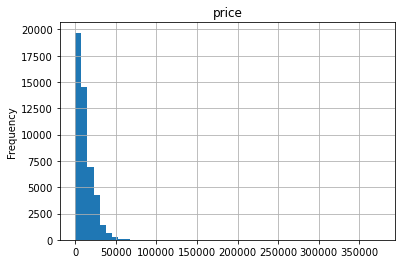

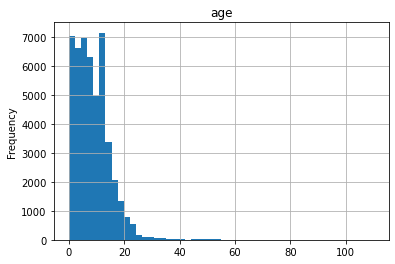

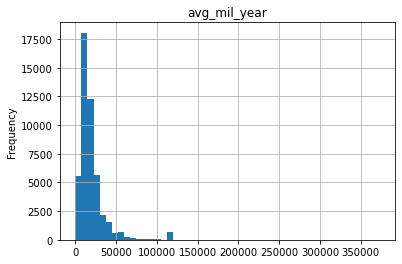

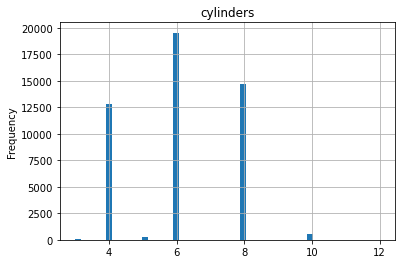

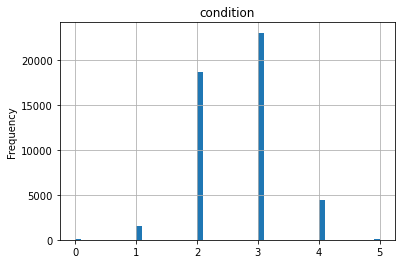

In [763]:
columns = ['price','age', 'avg_mil_year','cylinders','condition']
for col in columns:
    df[col].plot(kind='hist', bins=50, grid=True)
    plt.title(col)
    plt.show()

- From the histogram above: price, vehicle age, odometer and average mileage per year are too skewed to the left.

#### Price

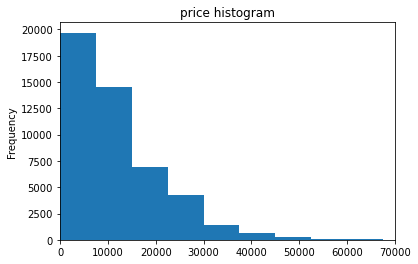

In [764]:
df['price'].plot(kind='hist', bins=50, xlim=(0,70000))
plt.title('price histogram')
plt.show()

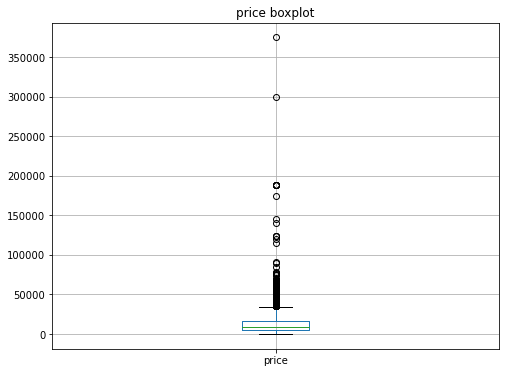

In [765]:
plt.figure(figsize=(8,6))
df.boxplot('price')
plt.title('price boxplot')
plt.show()

- Using IQR score to remove outliers

In [766]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 5000.0
Q3 : 16900.0
IQR : 11900.0


In [767]:
price_outliers = df.loc[(df['price'] < (Q1- 1.5*IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

In [768]:
len(price_outliers)

1546

In [769]:
len(price_outliers) / len(df) * 100

3.227153174967645

- There are 1546 price outliers which is 3% of data

#### Vehicle Age

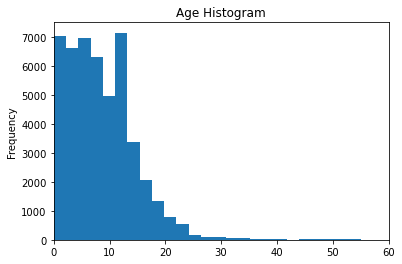

In [770]:
df['age'].plot(kind='hist',bins=50,xlim=(0,60))
plt.title('Age Histogram')
plt.show()

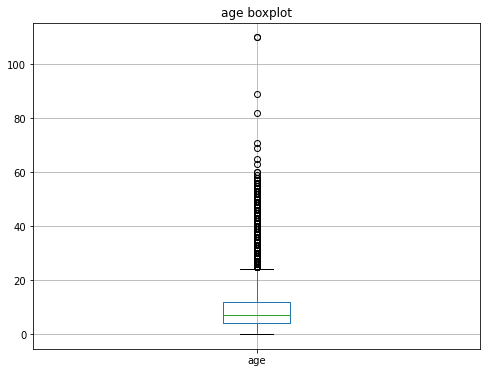

In [771]:
plt.figure(figsize=(8,6))
df.boxplot('age')
plt.title('age boxplot')
plt.show()

- Using IQR score to remove outliers

In [772]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 4.0
Q3 : 12.0
IQR : 8.0


In [773]:
age_outliers = df.loc[(df['age'] < (Q1- 1.5*IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

In [774]:
len(age_outliers)

737

In [775]:
len(age_outliers)/len(df)*100

1.5384294242892331

- There are 737 age outliers which is 1.5% of data

#### Average Mileage per Year

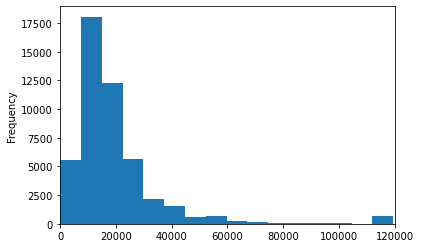

In [776]:
df['avg_mil_year'].plot(kind='hist',bins=50, xlim=(0,120000))

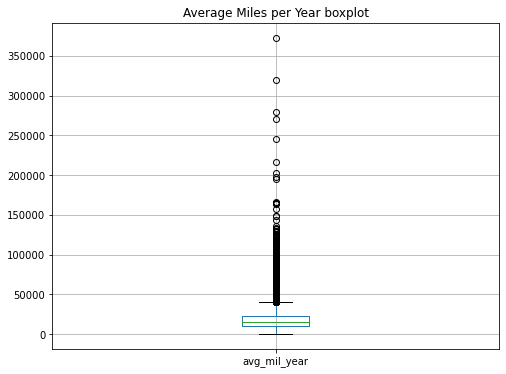

In [777]:
plt.figure(figsize=(8,6))
df.boxplot('avg_mil_year')
plt.title('Average Miles per Year boxplot')
plt.show()

- Using IQR score to remove outliers

In [778]:
Q1 = df['avg_mil_year'].quantile(0.25)
Q3 = df['avg_mil_year'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 10316.0
Q3 : 22428.0
IQR : 12112.0


In [779]:
mil_outliers = df.loc[(df['avg_mil_year'] < (Q1- 1.5*IQR)) | (df['avg_mil_year'] > (Q3 + 1.5 * IQR))]

In [780]:
len(mil_outliers)

3214

In [781]:
len(mil_outliers) / len(df) * 100

6.708971736316954

- There are 3214 average mileage per year outliers which is 6.7% data

#### Cylinders

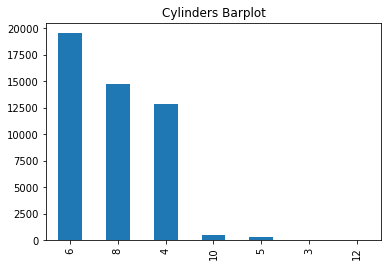

In [782]:
df['cylinders'].value_counts().plot(kind='bar')
plt.title('Cylinders Barplot')
plt.show()

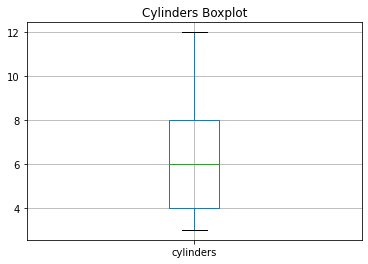

In [783]:
df.boxplot('cylinders')
plt.title('Cylinders Boxplot')
plt.show()

- There is no outliers at cylinders.

In [784]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 4.0
Q3 : 8.0
IQR : 4.0


In [785]:
cylinders_outliers = df.loc[(df['cylinders'] < (Q1- 1.5*IQR)) | (df['cylinders'] > (Q3 + 1.5 * IQR))]

In [786]:
len(cylinders_outliers)

0

- It is proven that there is no outliers at cylinders.

#### Condition

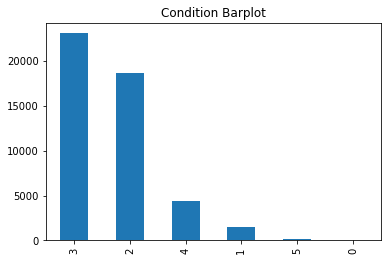

In [787]:
df['condition'].value_counts().plot(kind='bar')
plt.title('Condition Barplot')
plt.show()

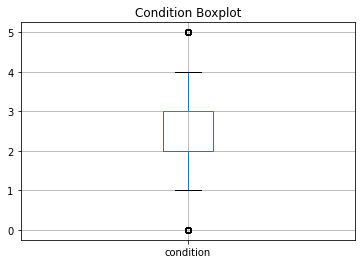

In [788]:
df.boxplot('condition')
plt.title('Condition Boxplot')
plt.show()

In [789]:
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")

Q1 : 2.0
Q3 : 3.0
IQR : 1.0


In [790]:
condition_outliers = df.loc[(df['condition'] < (Q1- 1.5*IQR)) | (df['condition'] > (Q3 + 1.5 * IQR))]

In [791]:
len(condition_outliers)

236

In [792]:
len(condition_outliers) / len(df) * 100

0.4926314031645306

- There is 236 condition outliers which is 0.49%

#### Combine all outliers and remove the duplicates

In [793]:
all_outliers = pd.concat([price_outliers, age_outliers,mil_outliers, cylinders_outliers, condition_outliers])
len(all_outliers)

5733

In [794]:
len(all_outliers)/len(df)*100

11.967185738738364

- There are 5733 outliers rows with duplicates which is 11.97%

In [795]:
all_outliers.duplicated().sum()

456

In [796]:
all_outliers = all_outliers.drop_duplicates()

In [797]:
len(all_outliers)

5277

In [798]:
len(all_outliers)/len(df)*100

11.015321671606896

- There are 5277 rows of outliers no duplicates which is 11% data

- Create copy of dataframe with the outliers

In [799]:
outliers_df = df.copy()

#### Remove the Outliers

In [800]:
df = df[~df.index.isin(all_outliers.index)]

In [801]:
len(df)

42629

In [802]:
len(df)/length_original * 100

82.7345948568656

- After data preprocessing and outliers removal, the data set becomes 82.7% of the original data

#### Compare Histograms

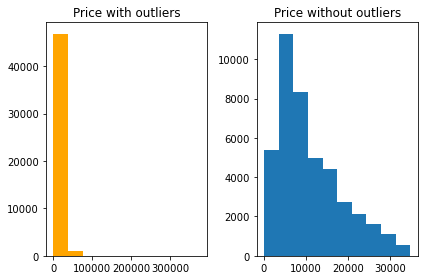

In [803]:
# Price
fig, ax = plt.subplots(1,2)
ax[0].hist(outliers_df['price'], color='orange')
ax[1].hist(df['price'])

ax[0].set_title("Price with outliers")
ax[1].set_title("Price without outliers")

plt.tight_layout()
plt.show()

- With the outliers removed, the histogram becomes more distributed. It removed the extreme price values.

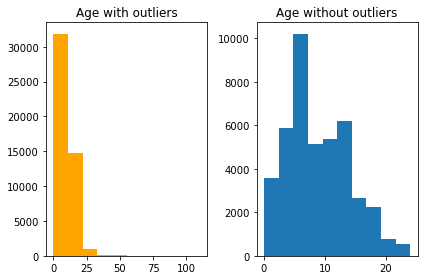

In [804]:
# Age
fig, ax = plt.subplots(1,2)
ax[0].hist(original_df['age'], color='orange')
ax[1].hist(df['age'])

ax[0].set_title("Age with outliers")
ax[1].set_title("Age without outliers")

plt.tight_layout()
plt.show()

- The age without outliers histogram becomes more distributed. The antique car (very old) is removed so the focus is in more common vehicle age

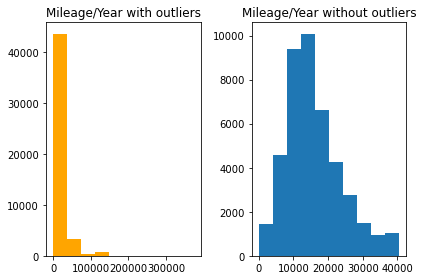

In [805]:
# Average Miles per Year
fig, ax = plt.subplots(1,2)
ax[0].hist(original_df['avg_mil_year'], color='orange')
ax[1].hist(df['avg_mil_year'])

ax[0].set_title("Mileage/Year with outliers")
ax[1].set_title("Mileage/Year without outliers")

plt.tight_layout()
plt.show()

- The histogram with the outliers removed becomes more distributed. It removes the extreme values of average mileage per year. 

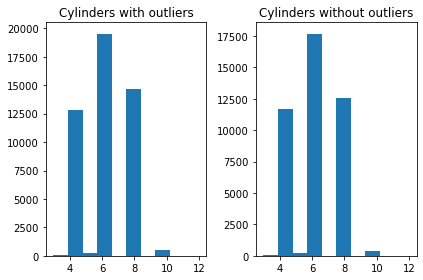

In [806]:
# Cylinders
fig, ax = plt.subplots(1,2)
ax[0].hist(original_df['cylinders'])
ax[1].hist(df['cylinders'])

ax[0].set_title("Cylinders with outliers")
ax[1].set_title("Cylinders without outliers")

plt.tight_layout()
plt.show()

- There is no outliers for Cylinders so the histogram still the same

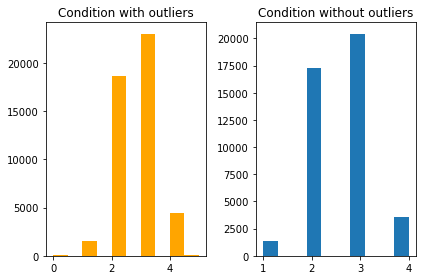

In [807]:
# Condition
fig, ax = plt.subplots(1,2)
ax[0].hist(original_df['condition'], color='orange')
ax[1].hist(df['condition'])

ax[0].set_title("Condition with outliers")
ax[1].set_title("Condition without outliers")

plt.tight_layout()
plt.show()

- In Condition without outliers, it removed the salvage condition (0 label values) since salvage condtion doesn't represent well the car price of working condition car.

### Days listed
Investigate how many days advertisement were displayed. Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

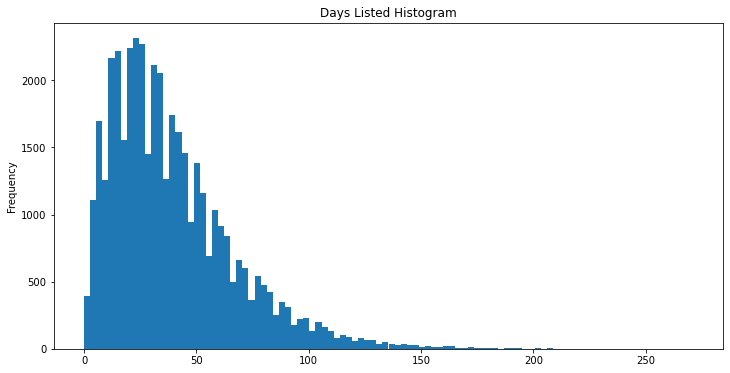

In [808]:
plt.figure(figsize=(12,6))
df['days_listed'].plot(kind='hist', bins=100)
plt.title('Days Listed Histogram')
plt.show()

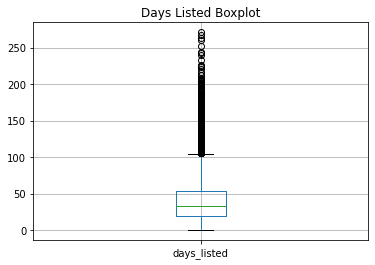

In [809]:
df.boxplot('days_listed')
plt.title('Days Listed Boxplot')
plt.show()

In [810]:
df['days_listed'].describe()

count    42629.000000
mean        39.577752
std         28.235637
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [811]:
df['days_listed'].value_counts().sort_index().head(10)

0     43
1    142
2    210
3    333
4    365
5    407
6    509
7    579
8    609
9    602
Name: days_listed, dtype: int64

In [812]:
Q1 = df['days_listed'].quantile(0.25)
Q3 = df['days_listed'].quantile(0.75)
IQR = Q3 - Q1
top_cut = (Q3 + 1.5 * IQR)
print(f"IQR : {IQR}")
print(f"top cut value : {top_cut}")

IQR : 34.0
top cut value : 104.0


- he typical lifetime of ads was 39 days with median of 33 days and a quarter 19 days. 
- The maximum value is 271 days (around 9 months).  
- The fastest ads were removed quickly was 0 days which is extra fast. Even though it's possible that a car was sold in hours after the ads listed, for example there was a customer that went to see a car in person at show room couple hours after the ads were listed. 
- Using IQR score to remove outliers, the top cutoff value was 104 days so the ads were considered too long if it's more than 104 days. However it still needs more investigation and information of what effects the ads duration.

In [813]:
df.pivot_table(index='model_category', values='days_listed', aggfunc='median')

,days_listed
model_category,
acura,33.5
bmw,34.0
buick,33.0
cadillac,34.0
chevrolet,33.0
chrysler,31.0
dodge,33.0
ford,33.0
gmc,34.0


In [814]:
df.pivot_table(index='condition', values='days_listed', aggfunc='median')

,days_listed
condition,
1,33
2,33
3,33
4,33


In [815]:
df.pivot_table(index='month', values='days_listed', aggfunc='median')

,days_listed
month,
1,33
2,34
3,34
4,34
5,33
6,34
7,33
8,33
9,33


In [816]:
df.pivot_table(index='year', values='days_listed', aggfunc='median')

,days_listed
year,
2018,33
2019,33


- The patterns seem consistent for the months the ad is posted, the year posted, the model category, and condition.

In [817]:
good_days_listed = df[~((df['days_listed']<=0) | (df['days_listed']>top_cut))]['days_listed']

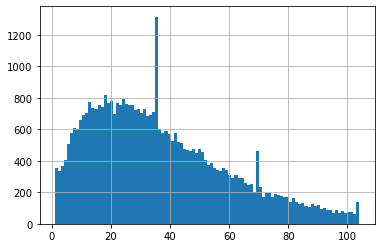

In [818]:
good_days_listed.hist(bins=100)

- The histogram above is if the outliers were removed based on IQR score for top cutoff and also removed the 0 value since it's too fast for ads lifetime.However we should investigate the reason what is effecting the duration of the posted ads. 
Since it needs more investigation and more information, the outliers removal for the days_listed were not be applied in the dataset. 

In [819]:
df.corr()['days_listed'].sort_values(ascending=False)

days_listed     1.000000
year            0.010606
odometer        0.008342
is_4wd          0.004123
age             0.002999
weekday         0.002678
cylinders       0.002000
avg_mil_year    0.001828
condition      -0.000437
model_year     -0.002032
price          -0.003932
month          -0.009981
Name: days_listed, dtype: float64

- If checking the correlation days_listed with other parameters, there is not enough good correlation that effect the lifetime of ads. However the year, month and the odometer has slight better correlation than other parameters. But these parameters can't determine the good correlation. So it needs more investigation and more information.

### Number of Ads

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [820]:
length_original

51525

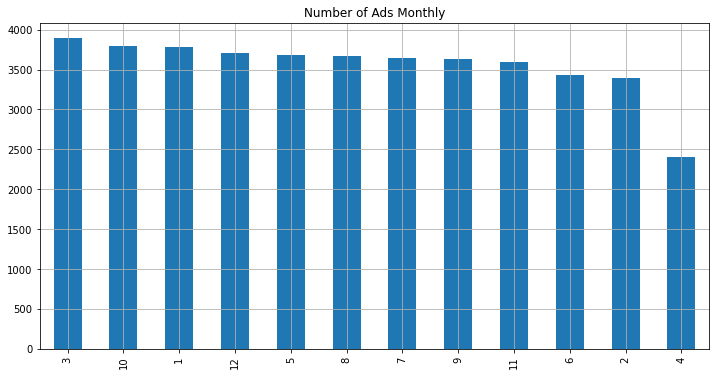

In [821]:
plt.figure(figsize=(12,6))
df['month'].value_counts().plot(kind='bar', grid=True)
plt.title('Number of Ads Monthly')
plt.show()

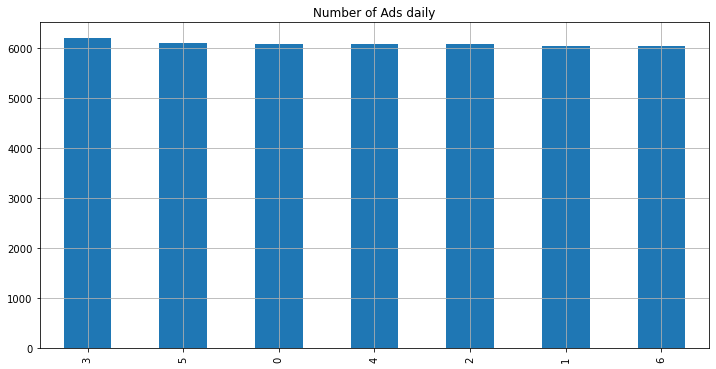

In [822]:
plt.figure(figsize=(12,6))
df['weekday'].value_counts().plot(kind='bar', grid=True)
plt.title('Number of Ads daily')
plt.show()

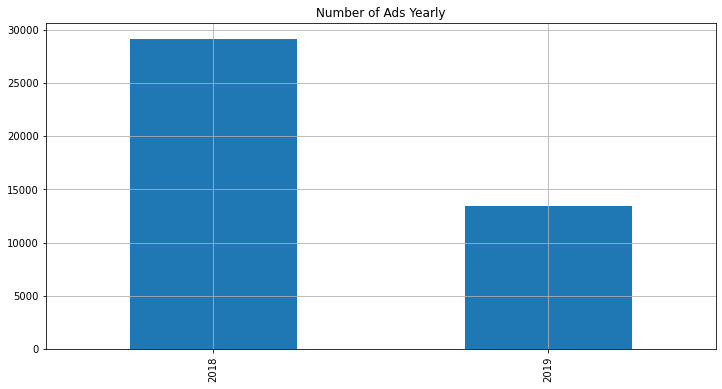

In [823]:
plt.figure(figsize=(12,6))
df['year'].value_counts().plot(kind='bar', grid=True)
plt.title('Number of Ads Yearly')
plt.show()

In [824]:
df['date_posted'].min()

Timestamp('2018-05-01 00:00:00')

In [825]:
df['date_posted'].max()

Timestamp('2019-04-19 00:00:00')

For weekday and month of the ads posted, we have consistent number. Checking the timestamp, the dataset date range is between May 1st 2018 to April 19 2019. The month of April was not a full month, this explained why the count in month 4 was less than other months count. It also explained why year 2019 was less than year 2018 since the data in 2019 was not a full year.

### Vehicle Types

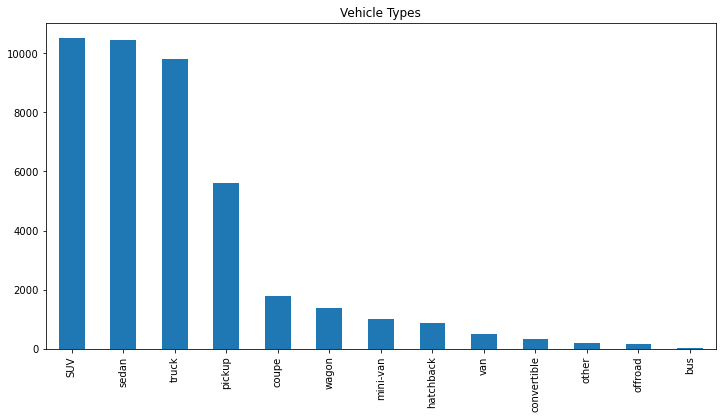

In [826]:
plt.figure(figsize=(12,6))
df['type'].value_counts().plot(kind='bar')
plt.title('Vehicle Types')
plt.show()

In [827]:
df['type'].value_counts()

SUV            10507
sedan          10438
truck           9814
pickup          5605
coupe           1790
wagon           1371
mini-van         997
hatchback        885
van              513
convertible      315
other            200
offroad          171
bus               23
Name: type, dtype: int64

In [828]:
df['type'].value_counts()/len(df)*100

SUV            24.647540
sedan          24.485679
truck          23.021887
pickup         13.148326
coupe           4.199019
wagon           3.216120
mini-van        2.338783
hatchback       2.076052
van             1.203406
convertible     0.738934
other           0.469164
offroad         0.401135
bus             0.053954
Name: type, dtype: float64

- The top 4 type are SUV, sedan, truck and pickup which are taking 84% data. The top 2 are SUV and sedan which take 50% data. 

In [829]:
df.groupby('type')['price'].mean().sort_values(ascending=False)

type
bus            17445.913043
truck          14454.139596
pickup         14362.471008
offroad        13867.643275
coupe          12876.284358
convertible    12642.730159
SUV            10084.579328
other           9599.690000
wagon           8671.040117
van             8150.434698
mini-van        7555.826479
sedan           6676.290477
hatchback       6550.489266
Name: price, dtype: float64

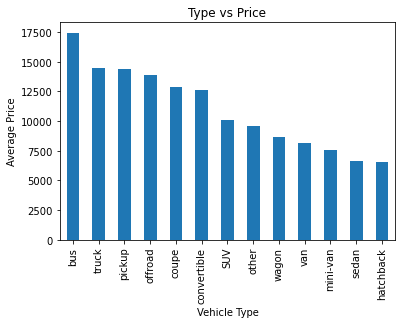

In [830]:
df.groupby('type')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Type vs Price')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.show()

- Based on average price, bus, truck, pickup have the largest price.

In [831]:
df.pivot_table(index='type', values='days_listed', aggfunc='median').sort_values(by='days_listed', ascending=False)

,days_listed
type,
bus,40
hatchback,36
wagon,35
SUV,34
coupe,33
mini-van,33
pickup,33
sedan,33
truck,33


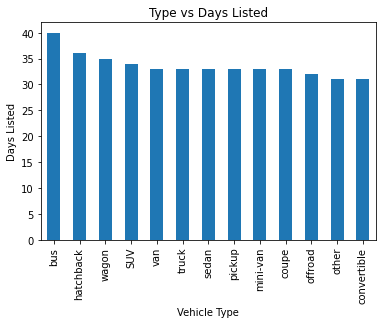

In [832]:
df.groupby('type')['days_listed'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Type vs Days Listed')
plt.xlabel('Vehicle Type')
plt.ylabel('Days Listed')
plt.show()

- Bus has the highest price but also the longest ads posted. 

- The most popular ads are SUV and sedan

### What factors impact price the most? - Based on popular types

Take each of the popular types that detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

#### SUV

In [844]:
suv = df.loc[df['type']=='SUV']

In [845]:
suv.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,avg_mil_year
price,1.000000,0.600332,0.259330,0.007522,-0.479539,0.124241,-0.019799,0.005282,-0.016070,0.012734,-0.598276,0.336122
model_year,0.600332,1.000000,0.321588,-0.247954,-0.578786,-0.070487,-0.014661,-0.002800,-0.032934,0.031803,-0.995581,0.598782
condition,0.259330,0.321588,1.000000,-0.089603,-0.306914,-0.008166,-0.012952,0.011424,-0.004748,0.004904,-0.320667,0.085356
cylinders,0.007522,-0.247954,-0.089603,1.000000,0.206243,0.111758,0.012296,-0.013022,0.001118,-0.006408,0.246997,-0.104840
odometer,-0.479539,-0.578786,-0.306914,0.206243,1.000000,0.023675,0.011948,0.008249,0.016367,-0.014237,0.576620,0.107956
is_4wd,0.124241,-0.070487,-0.008166,0.111758,0.023675,1.000000,-0.006682,0.017228,0.004334,-0.007682,0.069665,-0.035187
days_listed,-0.019799,-0.014661,-0.012952,0.012296,0.011948,-0.006682,1.000000,-0.002969,-0.003876,-0.000779,0.014567,-0.008233
weekday,0.005282,-0.002800,0.011424,-0.013022,0.008249,0.017228,-0.002969,1.000000,0.026773,-0.022843,0.000649,-0.000391
month,-0.016070,-0.032934,-0.004748,0.001118,0.016367,0.004334,-0.003876,0.026773,1.000000,-0.820377,-0.044194,0.089862
year,0.012734,0.031803,0.004904,-0.006408,-0.014237,-0.007682,-0.000779,-0.022843,-0.820377,1.000000,0.062200,-0.113107


In [846]:
suv.corr()['price'].sort_values(ascending=False)

price           1.000000
model_year      0.600332
avg_mil_year    0.336122
condition       0.259330
is_4wd          0.124241
year            0.012734
cylinders       0.007522
weekday         0.005282
month          -0.016070
days_listed    -0.019799
odometer       -0.479539
age            -0.598276
Name: price, dtype: float64

#### Sedan

In [839]:
sedan = df.loc[df['type']=='sedan']

In [840]:
sedan.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,avg_mil_year
price,1.000000,0.635104,0.291259,-0.022393,-0.532158,0.065002,0.002317,-0.006897,-0.046327,0.041688,-0.630678,0.257884
model_year,0.635104,1.000000,0.305042,-0.105759,-0.581240,0.073589,-0.002681,0.000162,-0.049577,0.049505,-0.994694,0.544767
condition,0.291259,0.305042,1.000000,-0.038964,-0.317135,0.020943,-0.008469,-0.008465,-0.008071,0.012988,-0.303641,0.064388
cylinders,-0.022393,-0.105759,-0.038964,1.000000,0.054727,0.181855,0.004272,-0.001664,-0.002099,0.001710,0.105913,-0.071168
odometer,-0.532158,-0.581240,-0.317135,0.054727,1.000000,-0.053922,0.008682,0.007145,0.021523,-0.015351,0.579539,0.171521
is_4wd,0.065002,0.073589,0.020943,0.181855,-0.053922,1.000000,0.011150,-0.021760,0.011336,-0.005901,-0.074182,0.033807
days_listed,0.002317,-0.002681,-0.008469,0.004272,0.008682,0.011150,1.000000,0.012912,-0.011198,0.015001,0.004226,0.000938
weekday,-0.006897,0.000162,-0.008465,-0.001664,0.007145,-0.021760,0.012912,1.000000,0.002042,-0.006204,-0.000801,0.010321
month,-0.046327,-0.049577,-0.008071,-0.002099,0.021523,0.011336,-0.011198,0.002042,1.000000,-0.822160,-0.035119,0.079919
year,0.041688,0.049505,0.012988,0.001710,-0.015351,-0.005901,0.015001,-0.006204,-0.822160,1.000000,0.053510,-0.098462


### What factors impact price the most? - Based on overall correlation and get dummies correlation

### Correlation

In [ ]:
# get dummies for each "type" category
df_dum = pd.get_dummies(df, columns=['type'])

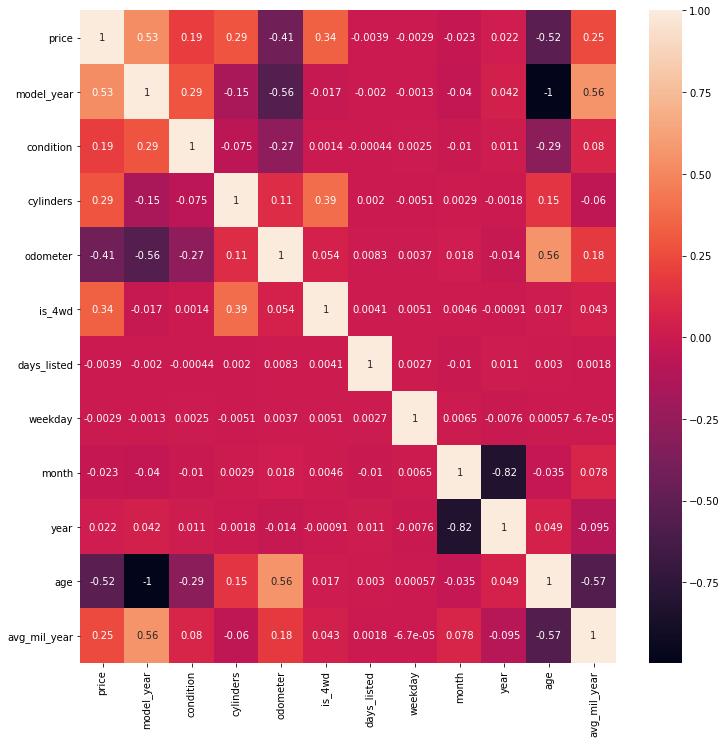

In [835]:
# Correlation without dummies
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

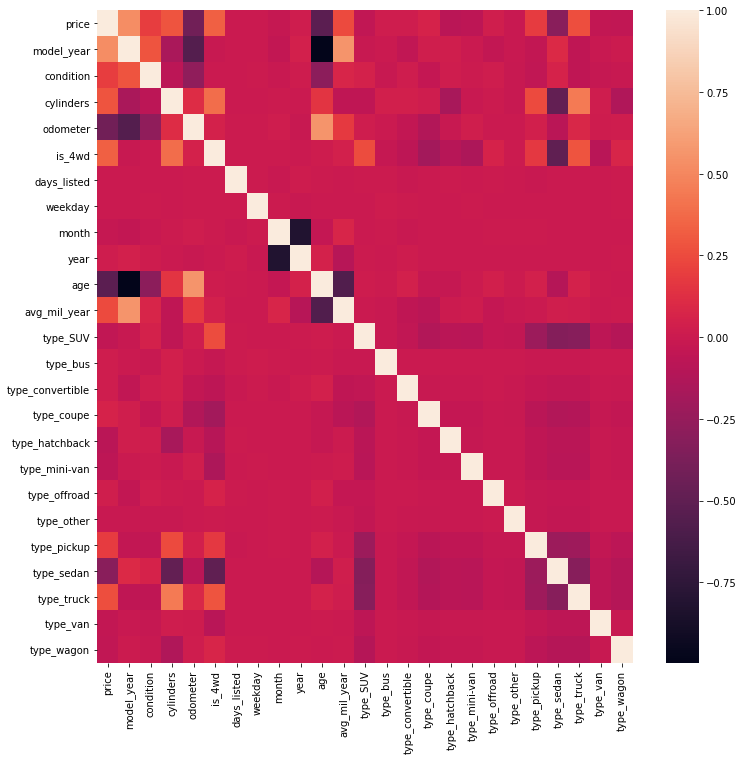

In [836]:
# Correlation with dummies
plt.figure(figsize=(12,12))
sns.heatmap(df_dum.corr())
plt.show()

In [837]:
# Correlation without dummies
df.corr()['price'].sort_values(ascending=False)

price           1.000000
model_year      0.526147
is_4wd          0.336919
cylinders       0.287240
avg_mil_year    0.249434
condition       0.190689
year            0.022019
weekday        -0.002917
days_listed    -0.003932
month          -0.022917
odometer       -0.411873
age            -0.523977
Name: price, dtype: float64

In [838]:
# Correlation with dummies
df_dum.corr()['price'].sort_values(ascending=False)

price               1.000000
model_year          0.526147
is_4wd              0.336919
cylinders           0.287240
type_truck          0.264922
avg_mil_year        0.249434
condition           0.190689
type_pickup         0.183795
type_coupe          0.057981
type_offroad        0.025849
year                0.022019
type_convertible    0.021245
type_bus            0.020396
weekday            -0.002917
days_listed        -0.003932
type_other         -0.010568
month              -0.022917
type_van           -0.038021
type_wagon         -0.050319
type_SUV           -0.051565
type_mini-van      -0.065411
type_hatchback     -0.080794
type_sedan         -0.306550
odometer           -0.411873
age                -0.523977
Name: price, dtype: float64

### Step 5. Overall conclusion

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [ ]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [ ]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn